# Classification des entreprises



In [213]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

## Chargement des données

In [214]:
#referentiel base source
source_entreprise=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_entreprise.shape

C:\Users\chris\AppData\Local\Temp\ipykernel_11624\1604957516.py:2: DtypeWarning: Columns (5,24,66,77) have mixed types. Specify dtype option on import or set low_memory=False.
  source_entreprise=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')


(8500, 385)

In [215]:
colonnes = list(source_entreprise.columns)
for colonne in colonnes:
    print(colonne)

Unnamed: 0
estimated_revenue_estimated_revenue_2020
instagram_url
ape_code
indeed_about_content
banking_data_solde_credit_equipement
net_result_2018
cartography_liens_entreprises_personnes
derniere_mise_a_jour_rcs
banking_data_bdf_score
revenue_2020
additional_info_naf_code
estimated_revenue_average_growth_of_the_siren
revenue_2022
solvability_ratio_2019
corporate_officer_name
estimated_revenue_estimated_revenue_2021
estimated_revenue_estimated_growth_2023
gross_operating_ebitda_ratio_2018
company_name
ape_name
banking_data_insurance_locaux
current_liabilities_2020
banking_data_is_significantly_changing
cartography_error
banking_data_solde_courant_moyen
beneficiaires_effectifs
banking_data_insurance_vehicules_pro
marques
equity_2021
resultat_exploitation_ratio_2022
opportunities_of_the_siret
gross_operating_ebitda_2020
web_scrap
postal_address_postal_address_additional_name
strenghts_of_the_siret
current_liabilities_2018
last_number_of_employees
gross_operating_ebitda_ratio_2019
google

In [216]:
source_entreprise_extract=source_entreprise[['ape_code','revenue_2022','company_name','ape_name',
                                             'resultat_exploitation_ratio_2022','last_number_of_employees','enrollment',
                                             'corporate_object','equity_2022','current_assets_2022',
                                             'gross_operating_ebitda_ratio_2022','net_result_2022','current_liabilities_2022',
                                             'capital','roe_2022','indeed_job_results_count','google_business_notation',
                                             'additional_info_region_code','net_debt_2022','reimbursement_ratio_2022',
                                             'siren','commercial_name','siret','robustness_ratio_2022','glassdoor_notation',
                                             'societeinfo_growth_ratio_2022','gross_operating_ebitda_2022','region_index',
                                             'resultat_d_exploitation_2022','solvability_ratio_2022','type_ent',
                                             'resultat_exploitation_ratio','net_result','current_assets','equity',
                                             'current_liabilities','revenue','robustness_ratio','solvability_ratio',
                                             'net_debt','gross_operating_ebitda','gross_operating_ebitda_ratio','CAGR_18_22',
                                             'RCI_2022','RCI','total_fonds','equity_costs','taux de recrutement',
                                             'RdtCpx_2022','RdtCpx','FRN_2022','FRN','reimbursement_ratio','RCI_21_22',
                                             'capital_moy_sect','enrollment_moy_sect','last_number_of_employees_moy_sect',
                                             'employees_number_for_linkedin_moy_sect','revenue_2022_moy_sect',
                                             'net_result_2022_moy_sect','equity_2022_moy_sect','roe_2022_moy_sect',
                                             'net_debt_2022_moy_sect','current_assets_2022_moy_sect',
                                             'current_liabilities_2022_moy_sect','solvability_ratio_2022_moy_sect',
                                             'gross_operating_ebitda_2022_moy_sect','gross_operating_ebitda_ratio_2022_moy_sect',
                                             'gross_operating_ebitda_ratio_moy_sect','reimbursement_ratio_2022_moy_sect',
                                             'robustness_ratio_2022_moy_sect','societeinfo_growth_ratio_2022_moy_sect',
                                             'resultat_exploitation_ratio_2022_moy_sect','resultat_d_exploitation_2022_moy_sect',
                                             'resultat_exploitation_ratio_moy_sect','net_result_moy_sect','current_assets_moy_sect',
                                             'equity_moy_sect','current_liabilities_moy_sect','revenue_moy_sect',
                                             'reimbursement_ratio_moy_sect','robustness_ratio_moy_sect','solvability_ratio_moy_sect',
                                             'net_debt_moy_sect','gross_operating_ebitda_moy_sect','CAGR_18_22_moy_sect',
                                             'RCI_2022_moy_sect','RCI_moy_sect','total_fonds_moy_sect','equity_costs_moy_sect',
                                             'enrollment_sum','last_number_of_employees_sum','employees_number_for_linkedin_sum',
                                             'revenue_2022_sum','roe_2022_sum','net_debt_2022_sum','gross_operating_ebitda_2022_sum',
                                             'resultat_d_exploitation_2022_sum','net_result_sum','revenue_sum','net_debt_sum',
                                             'pdm','pdm_2022']]

In [217]:
colonnes = list(source_entreprise_extract.columns)
for colonne in colonnes:
    print(colonne)

ape_code
revenue_2022
company_name
ape_name
resultat_exploitation_ratio_2022
last_number_of_employees
enrollment
corporate_object
equity_2022
current_assets_2022
gross_operating_ebitda_ratio_2022
net_result_2022
current_liabilities_2022
capital
roe_2022
indeed_job_results_count
google_business_notation
additional_info_region_code
net_debt_2022
reimbursement_ratio_2022
siren
commercial_name
siret
robustness_ratio_2022
glassdoor_notation
societeinfo_growth_ratio_2022
gross_operating_ebitda_2022
region_index
resultat_d_exploitation_2022
solvability_ratio_2022
type_ent
resultat_exploitation_ratio
net_result
current_assets
equity
current_liabilities
revenue
robustness_ratio
solvability_ratio
net_debt
gross_operating_ebitda
gross_operating_ebitda_ratio
CAGR_18_22
RCI_2022
RCI
total_fonds
equity_costs
taux de recrutement
RdtCpx_2022
RdtCpx
FRN_2022
FRN
reimbursement_ratio
RCI_21_22
capital_moy_sect
enrollment_moy_sect
last_number_of_employees_moy_sect
employees_number_for_linkedin_moy_sect
re

In [218]:
# Remplacez 'source_entreprise_extract' par le nom réel de votre DataFrame
source_entreprise_extract = source_entreprise_extract.copy()

# Liste des colonnes pour lesquelles limiter les valeurs extrêmes
columns = ['societeinfo_growth_ratio_2022', 'societeinfo_growth_ratio_2022_moy_sect', 'solvability_ratio_2022', 'robustness_ratio_2022',
           'gross_operating_ebitda_ratio_2022', 'CAGR_18_22', 'reimbursement_ratio_2022']

# Remplacer les valeurs extrêmes pour chaque colonne
for col in columns:
    lower_bound = source_entreprise_extract[col].quantile(0.01)
    upper_bound = source_entreprise_extract[col].quantile(0.99)
    source_entreprise_extract[col] = source_entreprise_extract[col].clip(lower=lower_bound, upper=upper_bound)

# Affichez le nouveau résumé des statistiques pour vérifier les changements
for col in columns:
    print(f"{col} après remplacement des valeurs extrêmes:")
    print(source_entreprise_extract[col].describe())
    print("\n")  # Ajoute un espace entre les descriptions pour plus de clarté

societeinfo_growth_ratio_2022 après remplacement des valeurs extrêmes:
count    2041.000000
mean        0.200431
std         0.516429
min        -0.359020
25%         0.000000
50%         0.085690
75%         0.220478
max         3.887574
Name: societeinfo_growth_ratio_2022, dtype: float64


societeinfo_growth_ratio_2022_moy_sect après remplacement des valeurs extrêmes:
count    8140.000000
mean        1.008162
std         5.151775
min        -0.075664
25%         0.073988
50%         0.132026
75%         0.232439
max        35.675858
Name: societeinfo_growth_ratio_2022_moy_sect, dtype: float64


solvability_ratio_2022 après remplacement des valeurs extrêmes:
count    1954.000000
mean        2.831833
std         5.150568
min       -12.883067
25%         1.186110
50%         1.929726
75%         3.305464
max        37.044385
Name: solvability_ratio_2022, dtype: float64


robustness_ratio_2022 après remplacement des valeurs extrêmes:
count    1926.000000
mean        0.045415
std         

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

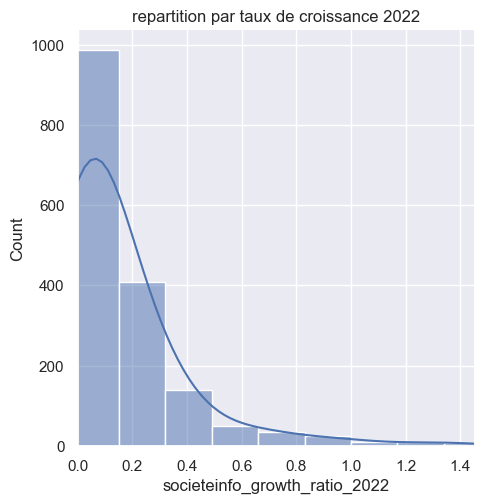

In [219]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(30)]  # Range de 0 à 140% par tranche de 15%

sns.displot(data=source_entreprise_extract, x='societeinfo_growth_ratio_2022', bins=25, kde=True) 
plt.title("repartition par taux de croissance 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

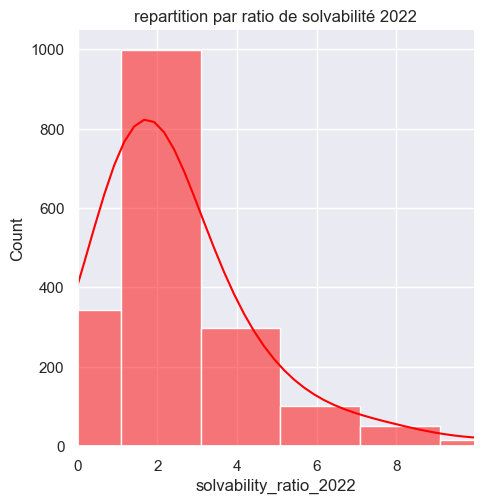

In [220]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(200)]  

sns.displot(data=source_entreprise_extract, x='solvability_ratio_2022', bins=25, color='red',kde=True) 
plt.title("repartition par ratio de solvabilité 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

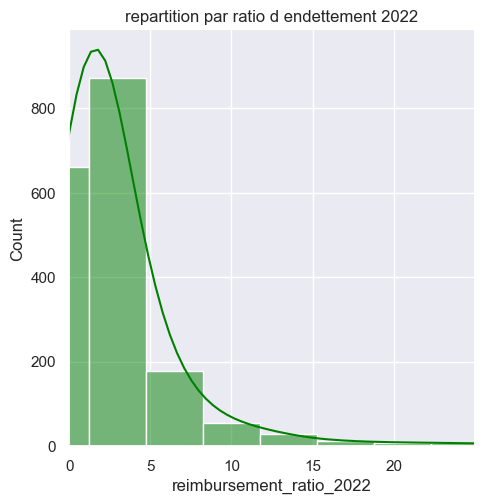

In [221]:
plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [0 + 0.05 * i for i in range(500)]  

sns.displot(data=source_entreprise_extract, x='reimbursement_ratio_2022', color='green', bins=25, kde=True) 
plt.title("repartition par ratio d endettement 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

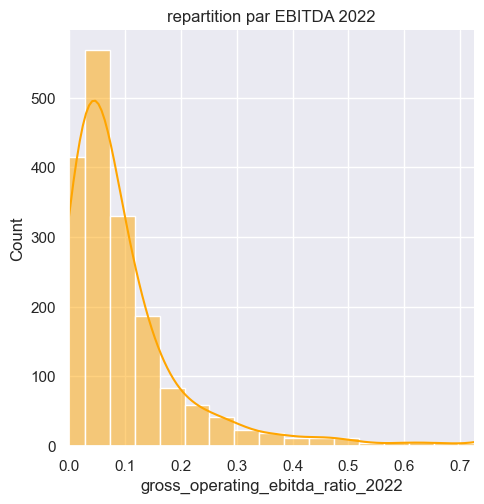

In [222]:

plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [-0.5 + 0.025 * i for i in range(50)]  

sns.displot(data=source_entreprise_extract, x='gross_operating_ebitda_ratio_2022', color='orange', bins=25, kde=True) 
plt.title("repartition par EBITDA 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

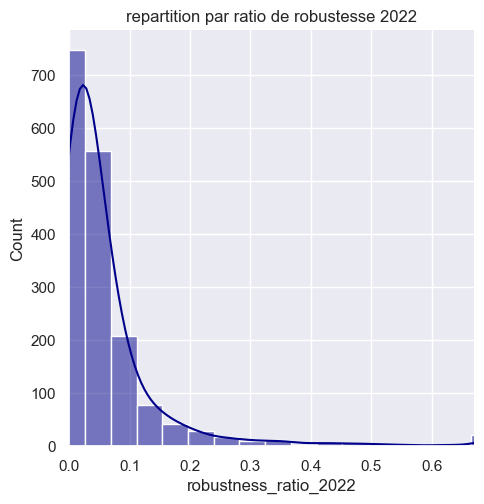

In [223]:

plt.figure(dpi=200)
sns.set(style='darkgrid')

# Définir les bords des intervalles (bins)
intervalles = [-0.5 + 0.03 * i for i in range(40)]  

sns.displot(data=source_entreprise_extract, x='robustness_ratio_2022', color='darkblue', bins=25, kde=True) 
plt.title("repartition par ratio de robustesse 2022")

# Ajustement des limites de l'axe X pour une meilleure lisibilité
plt.xlim(0, max(intervalles))

plt.show()

In [224]:
#referentiel base secteur
source_secteur=pd.read_csv('base_secteur_initiale.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_secteur.shape

(425, 162)

In [225]:
# classification manuelle de base source

def attribuer_classification(source_entreprise_extract):
    # Initialise la nouvelle colonne 'classification'
    source_entreprise_extract['classification'] = 'Non classifié'  # Valeur par défaut
    
    # Conditions pour 'Pépite'
    
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= 0.05) & (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5) &
        (source_entreprise_extract['CAGR_18_22'] > 0.03) & (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > 0.2) &
        (source_entreprise_extract['robustness_ratio_2022'] > 0.07) & (source_entreprise_extract['solvability_ratio_2022'] > 1.5),
        'classification'] = 'Pépite'
    
    # Conditions pour 'À risque'
    
    source_entreprise_extract.loc[
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0) & (source_entreprise_extract['CAGR_18_22'] <=0) &
        (source_entreprise_extract['solvability_ratio_2022'] <= 1) ,
        'classification'] = 'À risque'
    
    # Conditions pour 'À surveiller'
    
    conditions_surveiller = (
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0).astype(int) + (source_entreprise_extract['reimbursement_ratio_2022'] > 2.5).astype(int) +
        (source_entreprise_extract['CAGR_18_22'] < 0.03).astype(int) + (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] < 0.10).astype(int) +
        (source_entreprise_extract['robustness_ratio_2022'] < 0.02).astype(int) + (source_entreprise_extract['solvability_ratio_2022'] < 1).astype(int) )
        
    source_entreprise_extract.loc[(conditions_surveiller >= 2) & (source_entreprise_extract['classification'] == 'Non classifié'), 'classification'] = 'À surveiller'
    
    # Conditions pour 'À potentiel'
    
    conditions_potentiel = (
        (source_entreprise_extract['societeinfo_growth_ratio_2022'] >= 0.05).astype(int) + (source_entreprise_extract['reimbursement_ratio_2022'] < 2.5).astype(int) +
        (source_entreprise_extract['CAGR_18_22'] > 0.03).astype(int) + (source_entreprise_extract['gross_operating_ebitda_ratio_2022'] > 0.2).astype(int) +
        (source_entreprise_extract['robustness_ratio_2022'] > 0.07).astype(int) + (source_entreprise_extract['solvability_ratio_2022'] > 1.5).astype(int))
    
    source_entreprise_extract.loc[(conditions_potentiel >= 2) & (source_entreprise_extract['classification'] == 'Non classifié'), 'classification'] = 'À potentiel'
    
    # Retourne le DataFrame modifié
    return source_entreprise_extract

# Applique la fonction

source_entreprise_extract = attribuer_classification(source_entreprise_extract)


In [226]:
à_risque=source_entreprise_extract[source_entreprise_extract['societeinfo_growth_ratio_2022'] < 0]
à_risque=à_risque[['societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']]
à_risque.head(100)

,societeinfo_growth_ratio_2022,reimbursement_ratio_2022,CAGR_18_22,gross_operating_ebitda_ratio_2022,robustness_ratio_2022,solvability_ratio_2022
2,-0.203398,0.102249,2.000000,-0.049504,0.269365,0.461850
70,-0.010576,0.302580,0.112140,0.096840,0.038308,0.235925
111,-0.014912,0.386211,0.136288,0.068245,0.027943,1.001231
112,-0.143421,2.267511,0.127080,0.054299,0.022460,3.029226
118,-0.174710,4.261895,0.547461,0.005300,0.002415,5.155615
...,...,...,...,...,...,...
2763,-0.040491,1.203484,-0.149551,0.009573,0.006545,2.100162
2834,-0.099935,-9.421868,0.382567,-0.035539,-0.164217,-8.298440
2875,-0.248110,2.089734,0.126988,0.095525,0.017431,2.407115
2890,-0.287386,3.047034,0.231154,0.049239,0.032025,3.786950


In [227]:
## CLASSEMENT MANUEL

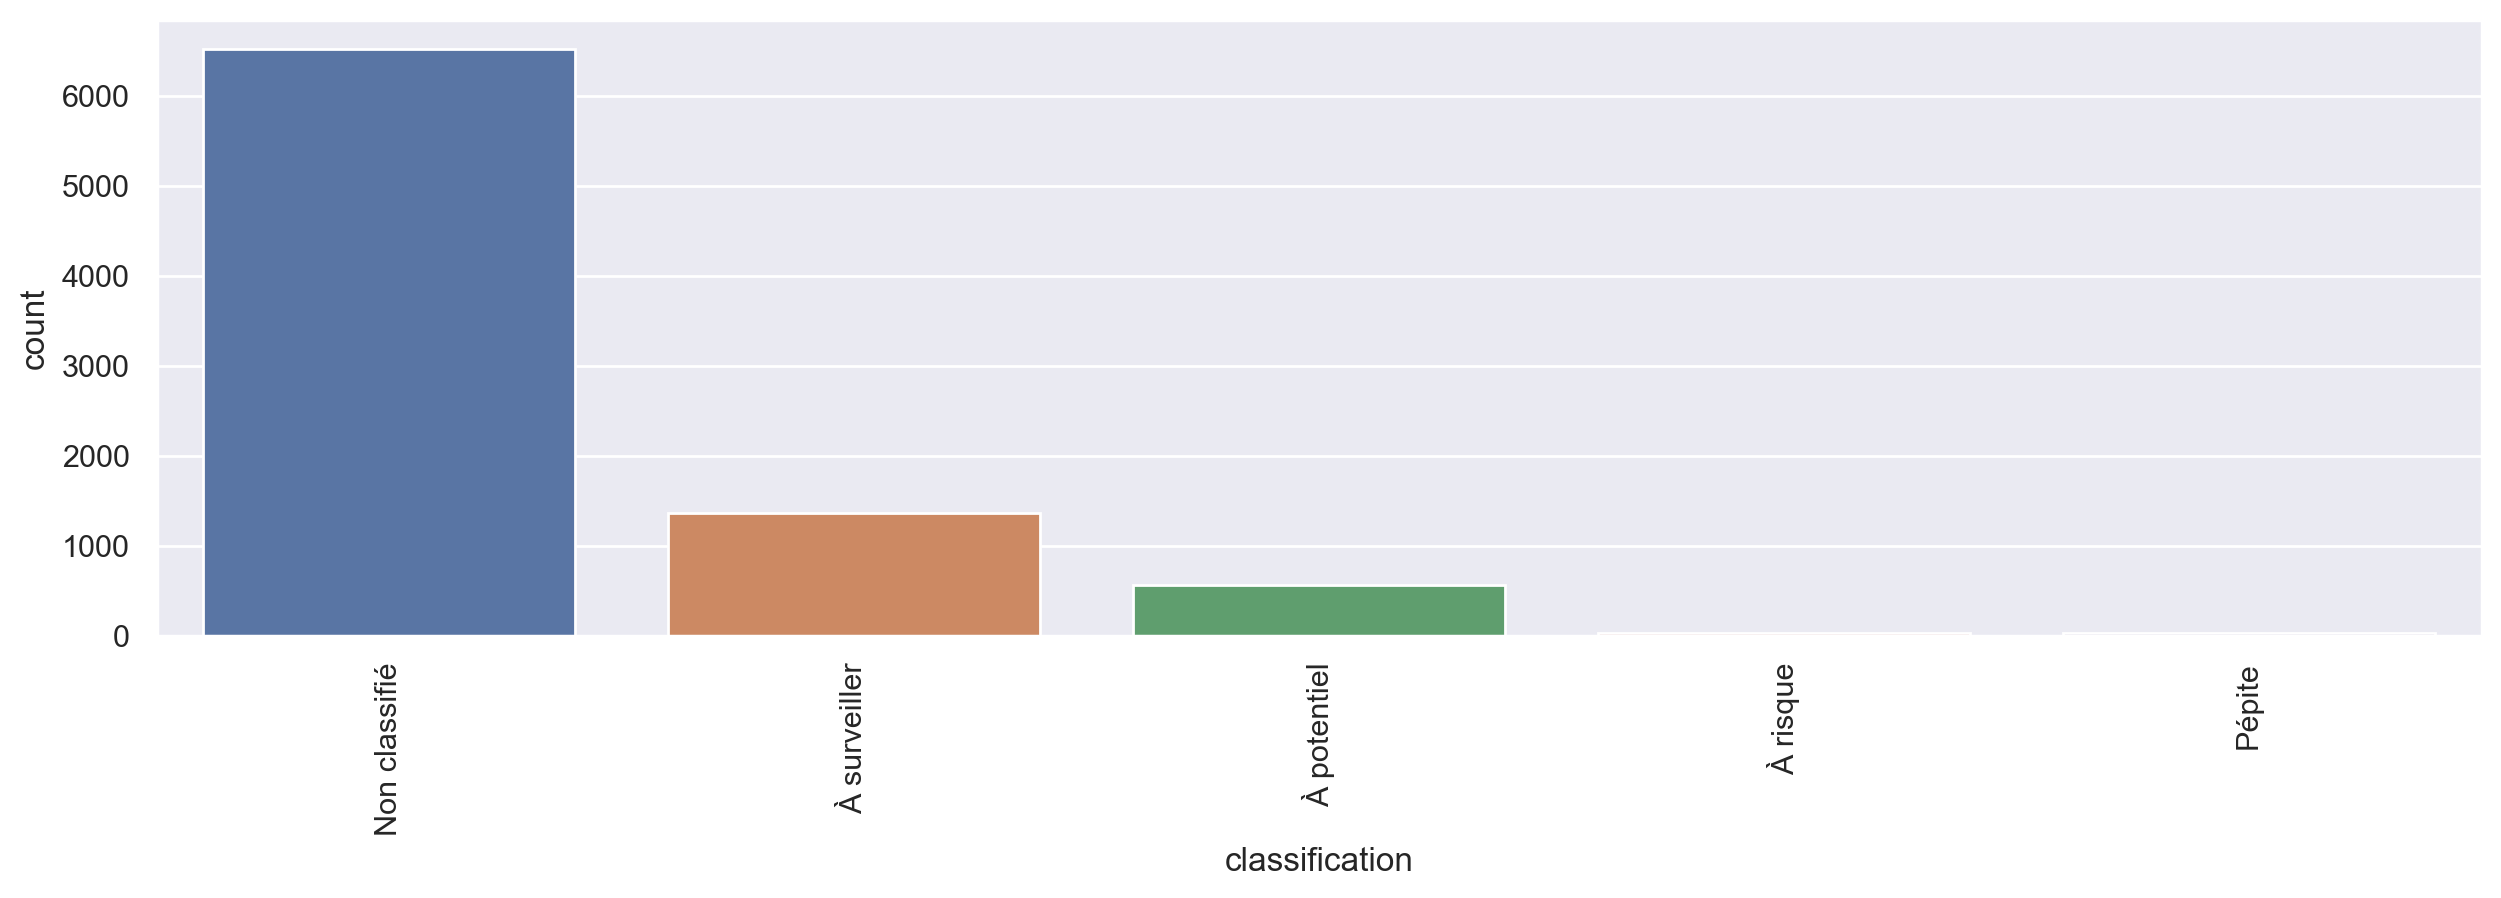

In [228]:

plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= source_entreprise_extract)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [285]:
panel_classifié =source_entreprise_extract[source_entreprise_extract['classification']!='Non classifié']
panel_classifié .to_csv('echantillon.csv', index='siren')

In [286]:
panel_classifié .shape

(1983, 104)

In [287]:
panel_non_classifié =source_entreprise_extract[source_entreprise_extract['classification']=='Non classifié']
panel_non_classifié .to_csv('echantillon.csv', index='siren')

In [288]:
panel_non_classifié .shape

(6517, 104)

In [289]:
nombre_par_categorie = source_entreprise_extract['classification'].value_counts()
print(nombre_par_categorie)

classification
Non classifié    6517
À surveiller     1362
À potentiel       565
À risque           29
Pépite             27
Name: count, dtype: int64


In [231]:
## CONSTITUTION DES DATAS DE TEST ET D 'ENTRAINEMENT'

In [290]:
features = panel[['societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']]

In [291]:
features.shape

(1983, 6)

In [292]:
valeur_attendue = panel_classifié[['classification']]

In [293]:
valeur_attendue.shape

(1983, 1)

## Affichage des correlations entre criteres

Text(0.5, 1.0, 'Distribution solvabilité / robustesse')

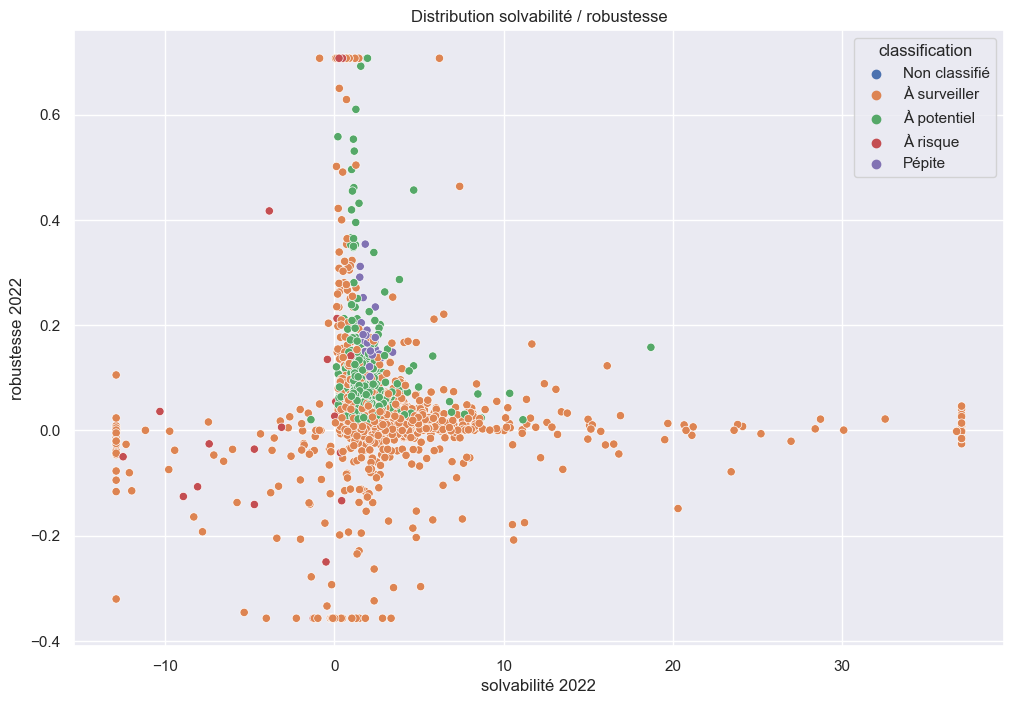

In [294]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='solvability_ratio_2022',y='robustness_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('solvabilité 2022')
plt.ylabel('robustesse 2022')
plt.title('Distribution solvabilité / robustesse')

Text(0.5, 1.0, 'Distribution croissance / endettement')

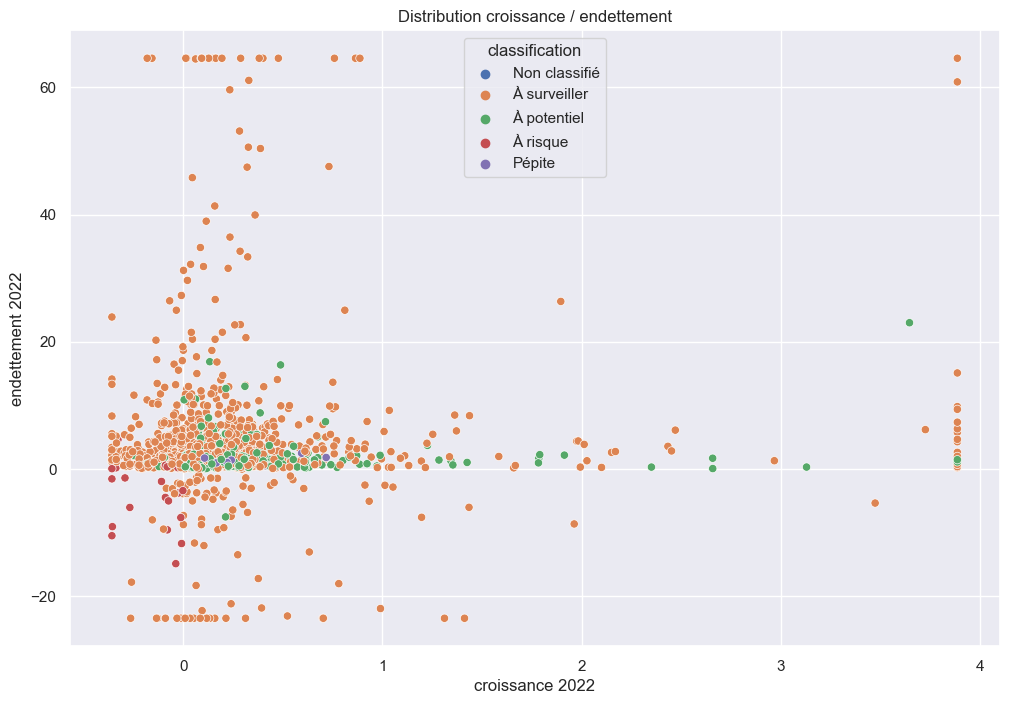

In [295]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='societeinfo_growth_ratio_2022',y='reimbursement_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('croissance 2022')
plt.ylabel('endettement 2022')
plt.title('Distribution croissance / endettement')

Text(0.5, 1.0, 'Distribution croissance / rentabilité')

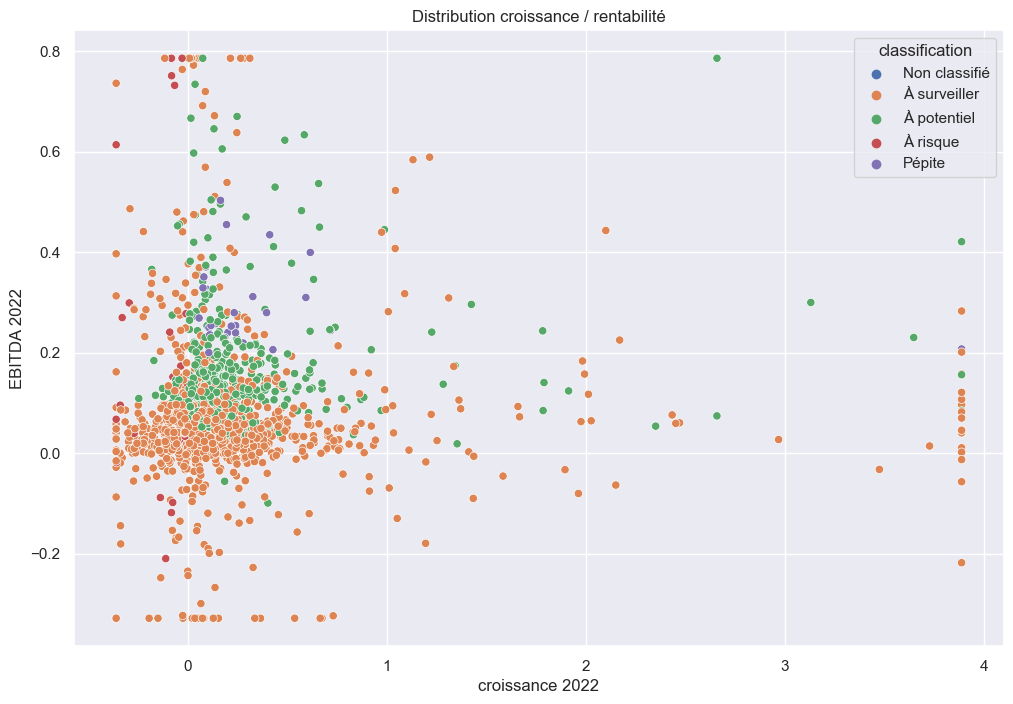

In [296]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='societeinfo_growth_ratio_2022',y='gross_operating_ebitda_ratio_2022',data=source_entreprise_extract,hue='classification')

plt.xlabel('croissance 2022')
plt.ylabel('EBITDA 2022')
plt.title('Distribution croissance / rentabilité')

## Modele de classification



In [299]:
# Identifier les colonnes avec des valeurs NaN
nan_counts = features.isna().sum()

# Afficher le nombre de valeurs NaN par colonne
print(nan_counts)

societeinfo_growth_ratio_2022        117
reimbursement_ratio_2022              37
CAGR_18_22                             0
gross_operating_ebitda_ratio_2022     60
robustness_ratio_2022                 60
solvability_ratio_2022                37
dtype: int64


In [300]:
# Supprimer les lignes contenant des NaN
cleaned_data = features.dropna()
cleaned_labels = valeur_attendue.loc[cleaned_data.index]  # Assurez-vous que les étiquettes correspondent aux données nettoyées

In [301]:

# Préparation des données
X = cleaned_data
y = cleaned_labels

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [302]:
# Avant de supprimer les lignes, assurez-vous que la longueur des ensembles X et y est la même
# Siaucune erreur, cela signifie que les assertions sont passées : les longueurs de X_train et y_train sont identiques, 
# de même que celles de X_test et y_test. Il n'y a pas de "résultat" au sens habituel à voir ; 
# l'absence d'erreur est en elle-même le résultat indiquant que les conditions d'assertion sont remplies.


assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [303]:
# presence de NaN dans y_train / y_test
unique_categories_y_train = np.unique(y_train)
print("Catégories uniques dans y_train:", unique_categories_y_train)

unique_categories_y_test = np.unique(y_test)
print("Catégories uniques dans y_test:", unique_categories_y_test)


Catégories uniques dans y_train: ['Pépite' 'À potentiel' 'À risque' 'À surveiller']
Catégories uniques dans y_test: ['Pépite' 'À potentiel' 'À risque' 'À surveiller']


In [304]:
# Identifier les colonnes avec des valeurs NaN pour les DataFrames
nan_counts_X_train = X_train.isna().sum()
nan_counts_X_test = X_test.isna().sum()
print("NaN dans X_train:", nan_counts_X_train)
print("NaN dans X_test:", nan_counts_X_test)

NaN dans X_train: societeinfo_growth_ratio_2022        0
reimbursement_ratio_2022             0
CAGR_18_22                           0
gross_operating_ebitda_ratio_2022    0
robustness_ratio_2022                0
solvability_ratio_2022               0
dtype: int64
NaN dans X_test: societeinfo_growth_ratio_2022        0
reimbursement_ratio_2022             0
CAGR_18_22                           0
gross_operating_ebitda_ratio_2022    0
robustness_ratio_2022                0
solvability_ratio_2022               0
dtype: int64


In [305]:
# Choix du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Pépite       1.00      0.20      0.33         5
 À potentiel       0.93      0.91      0.92        92
    À risque       1.00      0.20      0.33        10
À surveiller       0.94      0.99      0.97       261

    accuracy                           0.94       368
   macro avg       0.97      0.58      0.64       368
weighted avg       0.94      0.94      0.93       368



C:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [246]:
# Pépite :

# Précision (Precision) : 100% signifie que toutes les prédictions de la classe "Pépite" étaient correctes. Cependant, cela doit être interprété avec prudence en raison du petit nombre d'échantillons.
# Rappel (Recall) : 20% signifie que seulement 20% des vraies "Pépite" ont été correctement identifiées par le modèle. Cela indique une faiblesse dans la capacité du modèle à détecter cette classe spécifique.
# Score F1 : 33% est assez bas, ce qui reflète le déséquilibre entre la précision et le rappel pour cette classe.

# À potentiel :

# Précision : 95% est excellent et indique que la grande majorité des prédictions pour cette classe étaient correctes.
# Rappel : 90% est également très bon, indiquant que le modèle a réussi à identifier la majorité des cas réels "À potentiel".
# Score F1 : 93% est un excellent score, indiquant un bon équilibre entre précision et rappel.

# À surveiller :

# Précision : 97% montre que presque toutes les entreprises classées comme "À surveiller" l'étaient à juste titre.
# Rappel : 100% indique que toutes les entreprises réellement à surveiller ont été détectées par le modèle.
# Score F1 : 98% est exceptionnellement élevé, reflétant d'excellentes performances à la fois en termes de précision et de rappel.

In [306]:

# Rééchantillonnage des ensembles de données X_train et y_train
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vous pouvez maintenant utiliser X_train_resampled et y_train_resampled pour entraîner votre modèle

# Entraînement du modèle
model.fit(X_train_resampled, y_train_resampled)


C:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [307]:
# Ajustement des pénalités de classe

# Créer le modèle avec des poids de classe équilibrés
model = RandomForestClassifier(n_estimators=200, random_state=84, class_weight='balanced')

# Entraîner le modèle avec les données rééchantillonnées
model.fit(X_train_resampled, y_train_resampled)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=84)

In [249]:
# Évaluation du modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Pépite       1.00      0.40      0.57         5
 À potentiel       0.89      0.92      0.91        92
    À risque       1.00      0.70      0.82        10
À surveiller       0.96      0.97      0.97       261

    accuracy                           0.95       368
   macro avg       0.96      0.75      0.82       368
weighted avg       0.95      0.95      0.94       368



In [308]:
# Initialiser le LabelEncoder
le = LabelEncoder()

# Encoder les étiquettes de l'ensemble d'entraînement et de test (categorie Classification)
y_train_encoded = le.fit_transform(y_train_resampled)
y_test_encoded = le.transform(y_test)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [309]:


# Création et entraînement du modèle XGBoost
xgb_model = XGBClassifier(random_state=84, scale_pos_weight=5)  # Ajustez scale_pos_weight si nécessaire
xgb_model.fit(X_train_resampled, y_train_encoded)

C:\Users\chris\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:52:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [310]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.94      0.98      0.96        92
           2       1.00      0.70      0.82        10
           3       0.98      0.99      0.98       261

    accuracy                           0.97       368
   macro avg       0.98      0.77      0.83       368
weighted avg       0.97      0.97      0.97       368



In [253]:
# Classe 0 (probablement "Pépite") :

# Précision : 100% indique que toutes les prédictions de cette classe étaient correctes. Cependant, comme il s'agit d'un petit échantillon (seulement 5 instances), cette métrique peut être trompeuse.
# Rappel : 40% signifie que le modèle n'a correctement identifié que 40% des instances réelles de cette classe. Cela indique que le modèle a des difficultés à détecter cette classe, probablement en raison de sa faible représentation dans les données.
# Score F1 : 57% est une moyenne harmonique entre la précision et le rappel, indiquant que le modèle n'est pas très performant pour cette classe.

# Classe 1 (probablement "À potentiel") :

# Précision : 94% est très bon, indiquant que la majorité des prédictions pour cette classe étaient correctes.
# Rappel : 99% est excellent, montrant que le modèle a réussi à identifier presque toutes les instances réelles de cette classe.
# Score F1 : 96% est également excellent, reflétant un bon équilibre entre la précision et le rappel pour cette classe.

# Classe 2 (probablement "À surveiller") :

# Précision : 100% est exceptionnel, signifiant que toutes les prédictions de cette classe étaient correctes.
# Rappel : 99% est également exceptionnel, indiquant que le modèle a identifié presque toutes les instances réelles de cette classe.
# Score F1 : 99% montre que le modèle est extrêmement performant pour cette classe.

# Classe 3 (probablement "risque") :
# Précision : 98% est exceptionnel, signifiant que toutes les prédictions de cette classe étaient correctes.
# Rappel : 99% est également exceptionnel, indiquant que le modèle a identifié presque toutes les instances réelles de cette classe.
# Score F1 : 98% montre que le modèle est extrêmement performant pour cette classe.

In [352]:

company_ids = panel_non_classifié['siren'].copy()  # Copiez les identifiants pour les utiliser plus tard

# supprimez les colonnes non nécessaires pour XGBoost, sans toucher à 'company_id'
cols_to_keep = ['siren','societeinfo_growth_ratio_2022','reimbursement_ratio_2022','CAGR_18_22',
                     'gross_operating_ebitda_ratio_2022','robustness_ratio_2022', 'solvability_ratio_2022']
X_full = panel_non_classifié[cols_to_keep]
X_full.head(20)

,siren,societeinfo_growth_ratio_2022,reimbursement_ratio_2022,CAGR_18_22,gross_operating_ebitda_ratio_2022,robustness_ratio_2022,solvability_ratio_2022
0,751570003.0,NaN,NaN,0.393102,NaN,NaN,NaN
1,304234636.0,NaN,NaN,0.014430,NaN,NaN,NaN
3,830671855.0,NaN,NaN,2.000000,NaN,NaN,NaN
4,404362576.0,NaN,NaN,-0.003962,NaN,NaN,NaN
5,342902228.0,NaN,NaN,0.024261,NaN,NaN,NaN
6,509019048.0,NaN,NaN,1.927732,NaN,NaN,NaN
7,54803770.0,NaN,NaN,-0.013406,NaN,NaN,NaN
8,955801253.0,NaN,NaN,0.183483,NaN,NaN,NaN
9,622780138.0,NaN,NaN,-0.002114,NaN,NaN,NaN
10,55801963.0,NaN,NaN,0.024205,NaN,NaN,NaN


In [353]:
# Séparer les identifiants et les caractéristiques
company_ids = X_full['siren'].copy()  # Conservez les identifiants
X_full = X_full.drop(columns=['siren'])  # Supprimez l'identifiant pour la prédiction

In [354]:

# Utilisez le modèle pour faire des prédictions sur l'ensemble de données complet.
y_full_pred = xgb_model.predict(X_full)

# décoder les prédictions pour revenir aux étiquettes originales :
y_full_pred_decoded = le.inverse_transform(y_full_pred)

In [355]:
# Créer un DataFrame pour les résultats
results_df = pd.DataFrame({'siren': company_ids, 'classification': y_full_pred_decoded})

# Fusionner les prédictions avec le DataFrame initial
merged_df = pd.merge(affectation_non_classifié, results_df, on='siren', how='left')

In [356]:
merged_df.head(5)

,ape_code,revenue_2022,company_name,ape_name,resultat_exploitation_ratio_2022,last_number_of_employees,enrollment,corporate_object,equity_2022,current_assets_2022,...,net_debt_2022_sum,gross_operating_ebitda_2022_sum,resultat_d_exploitation_2022_sum,net_result_sum,revenue_sum,net_debt_sum,pdm,pdm_2022,classification_x,classification_y
0,6820A,NaN,SOMEBY,Location de logements,NaN,51.0,51.0,Location de biens immobiliers à des bailleurs ...,NaN,NaN,...,63435349.0,-382218.0,12846104.0,2.154444e+08,2.369876e+09,1.116324e+10,0.002874,NaN,Non classifié,À potentiel
1,6820A,NaN,IN'LI SUD OUEST,Location de logements,NaN,62.0,62.0,"La société a pour objet principal, conformémen...",NaN,NaN,...,63435349.0,-382218.0,12846104.0,2.154444e+08,2.369876e+09,1.116324e+10,0.013830,NaN,Non classifié,À surveiller
2,6820A,NaN,PYLA EDIFICE,Location de logements,NaN,NaN,NaN,"Achat en vue de la revente d'immeuble, fonds d...",NaN,NaN,...,63435349.0,-382218.0,12846104.0,2.154444e+08,2.369876e+09,1.116324e+10,0.001798,NaN,Non classifié,À potentiel
3,6820A,NaN,RESIDENCES SERVICES GESTION,Location de logements,NaN,298.0,298.0,La gestion l'exploitation l'achat et la vente ...,NaN,NaN,...,63435349.0,-382218.0,12846104.0,2.154444e+08,2.369876e+09,1.116324e+10,0.047390,NaN,Non classifié,À surveiller
4,6820A,NaN,PRONY HABITATIONS,Location de logements,NaN,NaN,NaN,Location de logements,0.0,0.0,...,63435349.0,-382218.0,12846104.0,2.154444e+08,2.369876e+09,1.116324e+10,0.003039,NaN,Non classifié,À surveiller


In [357]:
print(merged_df.columns)

Index(['ape_code', 'revenue_2022', 'company_name', 'ape_name',
       'resultat_exploitation_ratio_2022', 'last_number_of_employees',
       'enrollment', 'corporate_object', 'equity_2022', 'current_assets_2022',
       ...
       'net_debt_2022_sum', 'gross_operating_ebitda_2022_sum',
       'resultat_d_exploitation_2022_sum', 'net_result_sum', 'revenue_sum',
       'net_debt_sum', 'pdm', 'pdm_2022', 'classification_x',
       'classification_y'],
      dtype='object', length=105)


In [358]:
merged_df = merged_df.drop(columns=['classification_x'])
merged_df = merged_df.rename(columns={'classification_y': 'classification'})

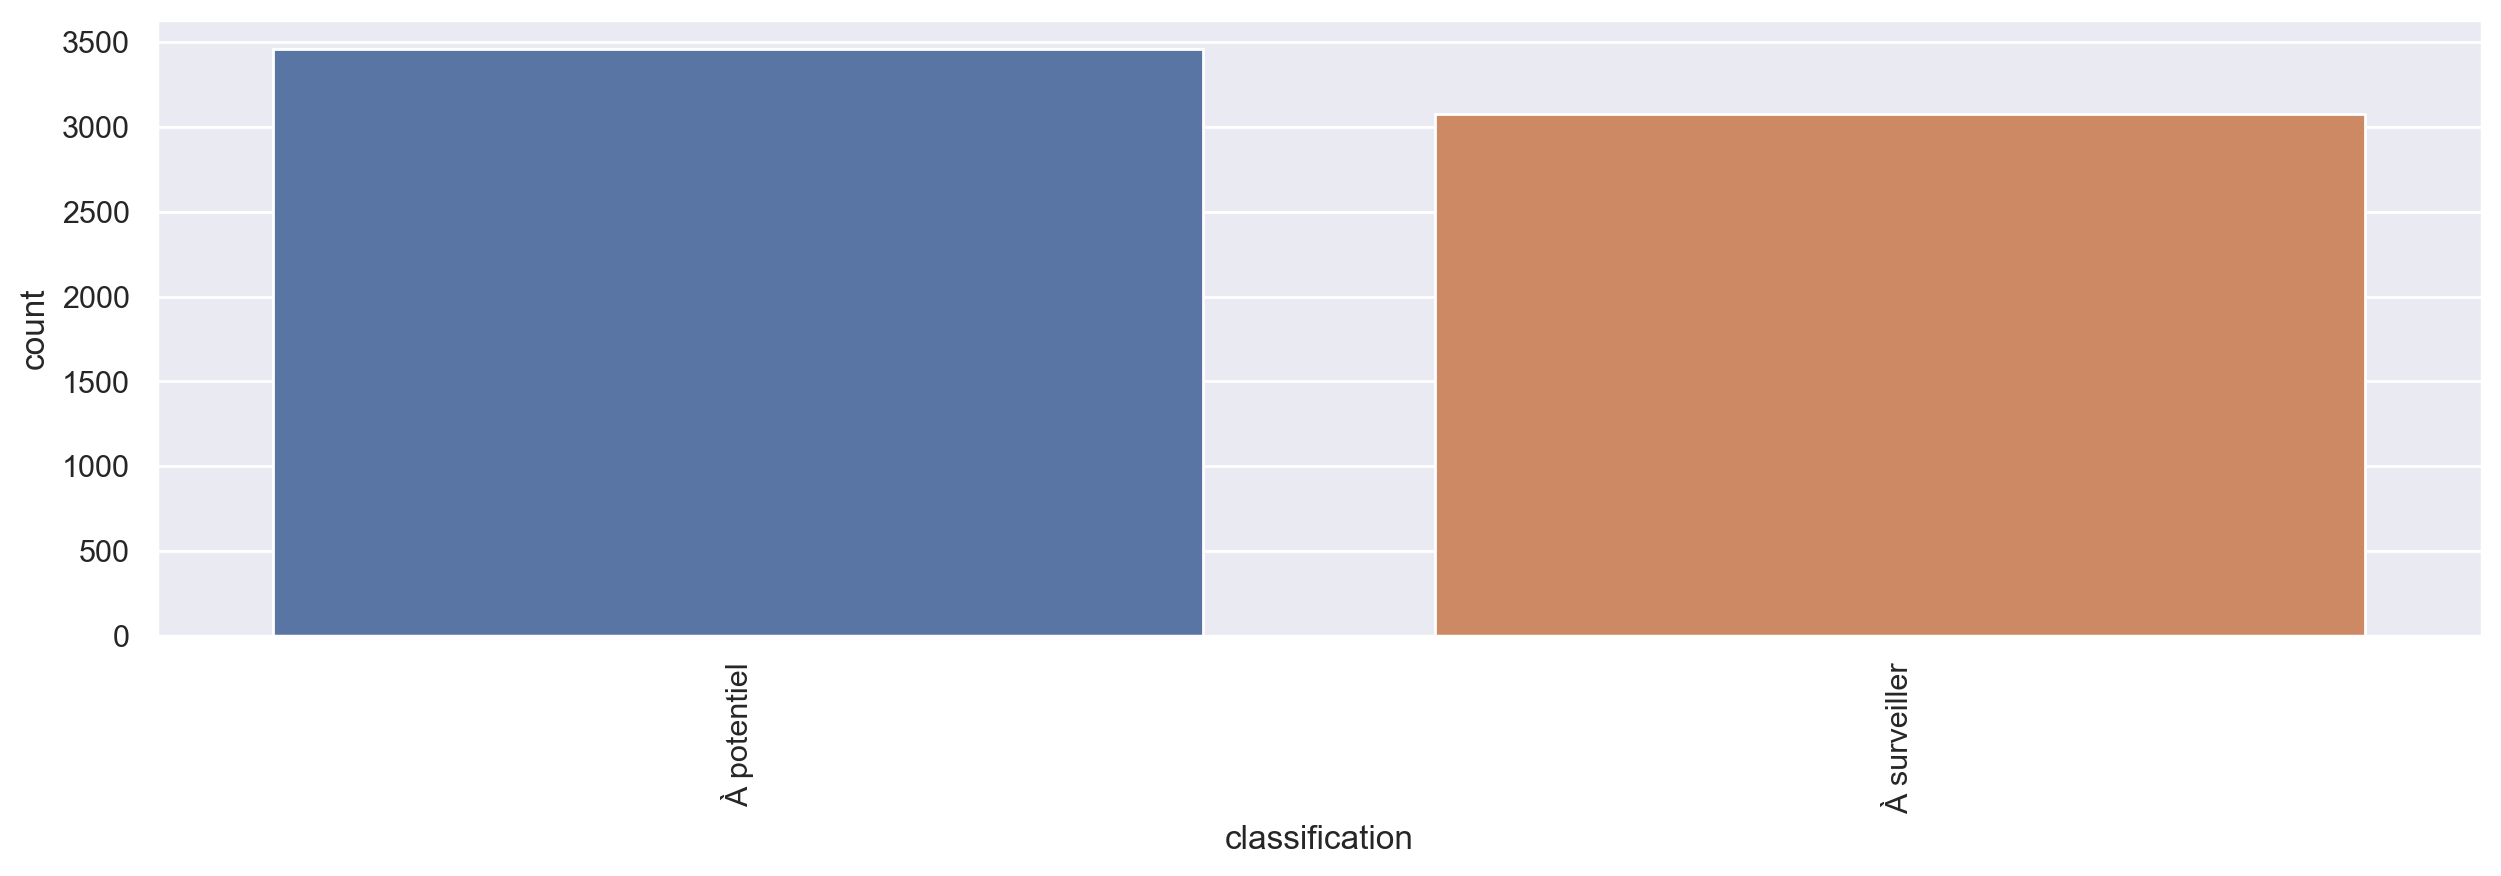

In [360]:

plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= merged_df)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [362]:
nombre_par_categorie = merged_df['classification'].value_counts()
print(nombre_par_categorie)

classification
À potentiel     3458
À surveiller    3075
Name: count, dtype: int64


In [363]:
# reconstituer le fichier complet

# Fusionner avec des suffixes pour identifier les colonnes en double
new_panel = pd.merge(merged_df, panel_classifié, on='siren', how='outer', suffixes=('', '_drop'))

# Garder les colonnes sans le suffixe '_drop'
new_panel = new_panel[[c for c in new_panel.columns if not c.endswith('_drop')]]

In [370]:
nombre_par_categorie = merged_df['classification'].value_counts()
print(nombre_par_categorie)

classification
À potentiel     3458
À surveiller    3075
Name: count, dtype: int64


In [371]:
nombre_par_categorie = panel_classifié['classification'].value_counts()
print(nombre_par_categorie)

classification
À surveiller    1362
À potentiel      565
À risque          29
Pépite            27
Name: count, dtype: int64


In [372]:
nombre_par_categorie = new_panel['classification'].value_counts()
print(nombre_par_categorie)

classification
À potentiel     3458
À surveiller    3075
Name: count, dtype: int64


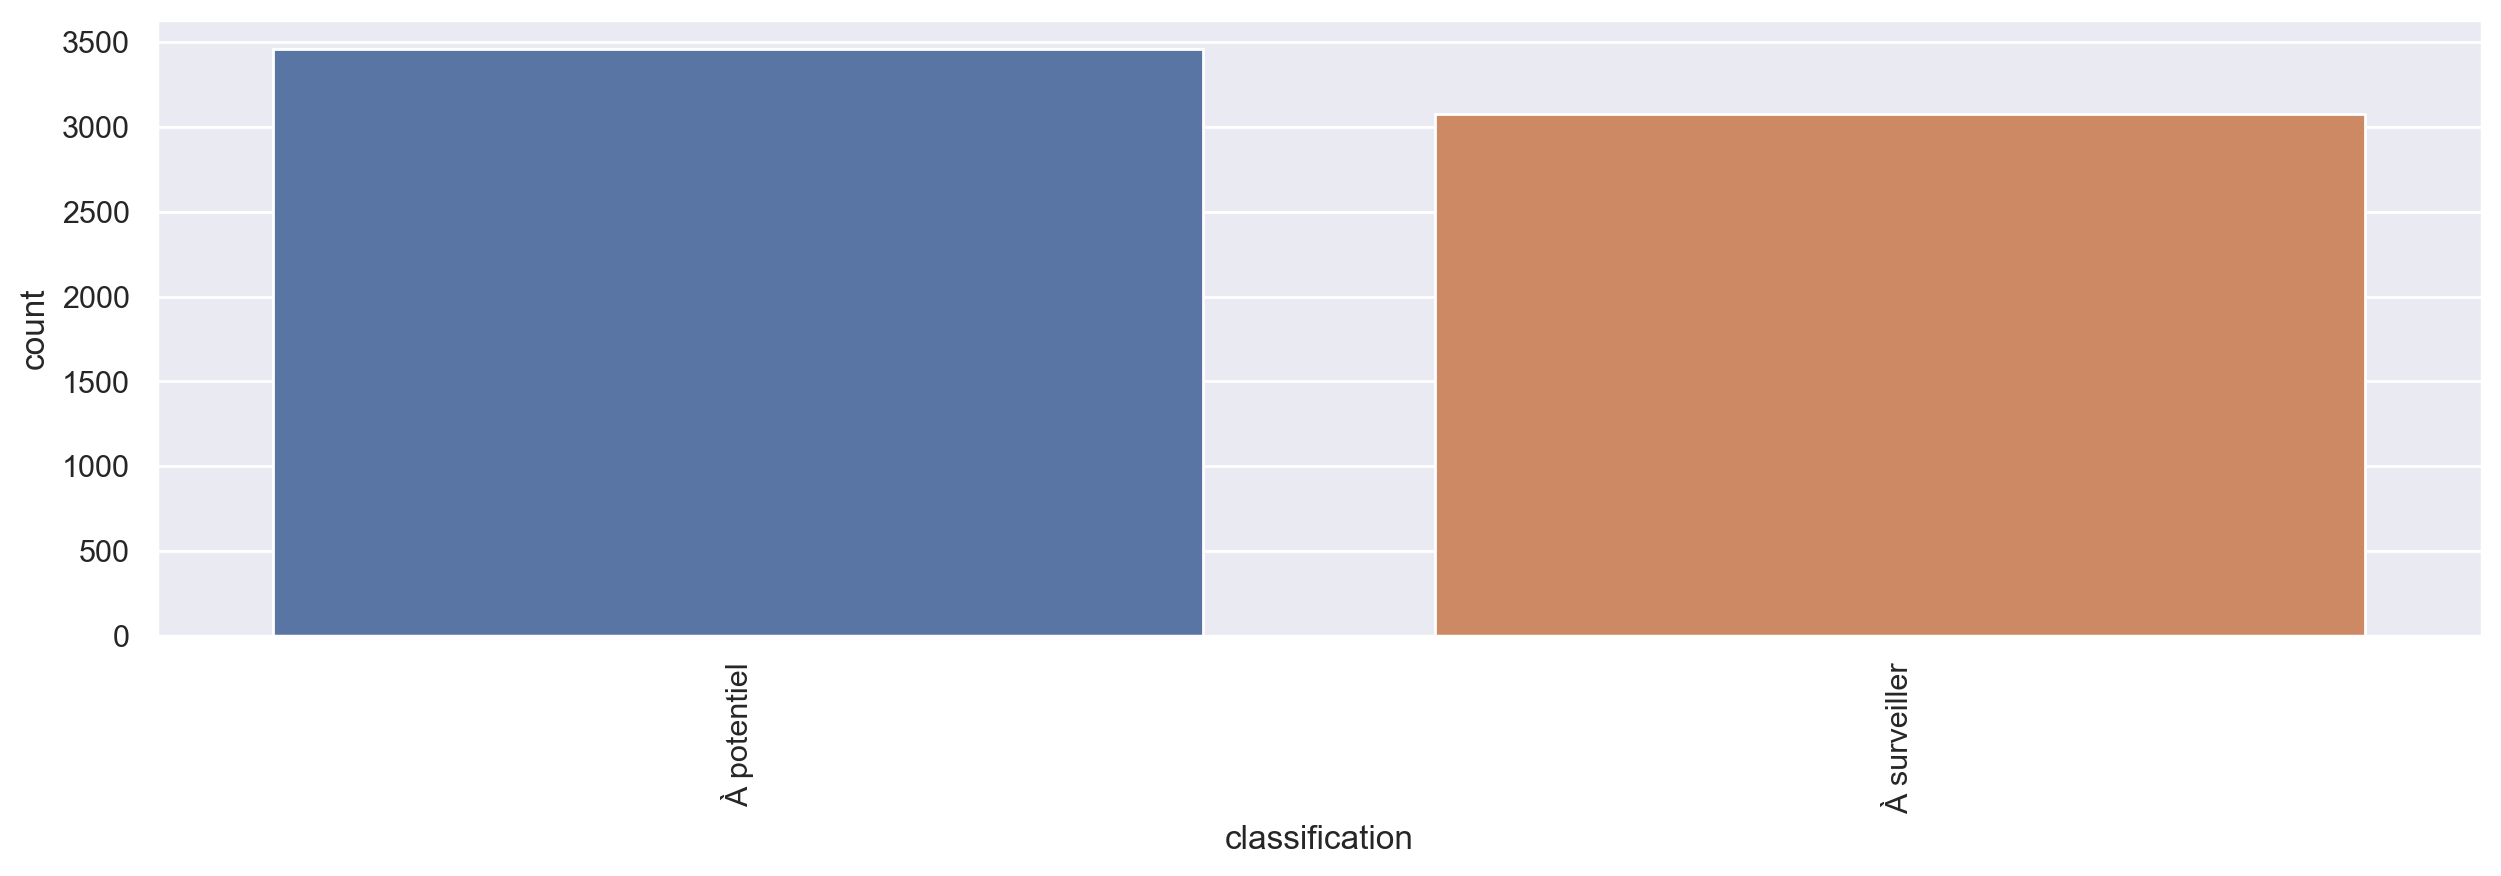

In [369]:
plt.figure(figsize=(15,4),dpi=200)
ax=sns.countplot(x='classification', data= new_panel)

# Incliner les étiquettes de l'axe des x à 90 degrés
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()